# Rocket Propulsion
***Final Project***

---

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# functions
def V1(R,T,p):
    return R*T/p

def Vy(V1,p1,py,k):
    return V1*( p1/py )**(1/k)

def Ty(T1,p1,py,k):
    return T1*( py/p1 )**( (k-1)/k )

def Vt(V1,k):
    return V1 *( (k+1)/2 )**(1/(k-1))

def Tt(T1,k):
    return 2*T1 / (k+1)

def vt(k,R,Tt):
    return np.sqrt(k*R*Tt)

def vy(T1,p1,py,k,R):
    return np.sqrt(2*k / (k-1) * R*T1 * (1 - (py/p1)**((k-1)/k)))

def My(Ty,vy,k,R):
    return vy / (k*R*Ty)**(1/2)

def Ay(m_dot,Vy,vy):
    return m_dot*Vy/vy

## Stage I

 Place the probe into a 500 km altitude parking orbit.
 
 For full credit: Design your own rocket system
- Must calculate vehicle Isp based on your design parameters
    - Fuel and Oxidizer · Chamber pressure · Nozzle design
    - mass flow rates
    - exit velocities
- Estimate your vehicle weight
    - References for similar components (or assumptions)
    - Similar existing vehicle weights also acceptable

| Parameter | Value   
|----|-:|
|Fuel | $H_2 (l)$ 
|Oxidizer | $O_2 (l)$ 
|Chamber pressure  | 10 MPa
| Expansion ratio  | 30:1
| Exit diameter  | 1.3 m

### $I_{sp} \space Calculation$

The optimal performance O/F mass ratio was determined by setting increasing values from 1 to 4.5 and observing how the $I_{sp}$ varied. Once the $I_{sp}$ reached a maximum value, the corresponding ratio was taken to be 4.2. For comparison, an O/F ratio $r =  4.1$ delivers an $I_{sp} = 431.10$ s, for $r =  4.2, \space I_{sp} = 431.11$ s, and for $r =  4.4, \space I_{sp} = 430.96$ s 

| Parameter | Value   
|----|-:|
|Optimal O/F ratio | 4.2
|$I_{sp}$ | 431.11 s

### Thrust force under ideal conditions

In [36]:
p_1 = 10e6 # Pa
A_r = 30 # area ratio
d_2 = 1.3 # m
A_2 = np.pi/4*d_2**2 # m^2
A_t = A_2/30 # m^2
v_t = 1617.6 # m/s
density_t = 2.5708 # kg/m^3
M_2 = 4.219
v_sonic_2 = 1002 # m/s
v_2 = M_2*v_sonic_2 # m/s
p_2 = .25416e5 # Pa

m_dot = A_t*v_t*density_t
F_ideal = m_dot*v_2

print("total mass-flow rate: %.2f kg/s" % m_dot)
print("ideal thrust:\t\t %d N" % F_ideal)

total mass-flow rate: 183.99 kg/s
ideal thrust:		 777807 N


### Thrust force at sea-level

The thrust force can be determined by using the equation $F = \dot{m}v_2 + (p_2 - p_3)A_2$.

In [37]:
p_3 = 1.013e5 # Pa
F_sea = m_dot*v_2 + (p_2 - p_3)*A_2
print("sea-level thrust:\t %d N" % F_sea)

sea-level thrust:	 677084 N


There is a discrepancy between the values at ideal expansion conditions and at sea level becuase the pressure thrust term $(p_2-p_3)A_2$ becomes zero for ideal expansion, but is negative at sea level.

### Mass-flow rates for fuel and oxidizer

To determine the required mass-flow rates of the oxidizer and fuel, conservation of mass can be used. 

$$\dot{m}=\dot{m_1}+\dot{m_2}$$

Since the optimal O/F mass ratio $r$ was 4.2, then 4.2 times the oxidizer must enter the chamber per unit time.

$$\dot{m}=\dot{m_o}+\frac{1}{4.2}\dot{m_o}$$

In [38]:
r = 4.2
mo_dot = m_dot/(1 + 1/r); mf_dot = mo_dot/r
print("LOX mass-flow rate:\t %.2f kg/s" % mo_dot)
print("C2H6 mass-flow rate:\t %.2f kg/s" % mf_dot)

LOX mass-flow rate:	 148.61 kg/s
C2H6 mass-flow rate:	 35.38 kg/s


If the burn time is 200 s, then the total amount of $O_2 \space(l)$ and $H_2\space (l)$ can be found by multiplying their respective flow rates by 200 s.

### Ox and Fuel Weights

If the rocket is designed to have burnout time of 200 s, then the total mass can be calculated from the mass-flow rates.

In [39]:
t_burn = 200 # s
m_o = mo_dot*t_burn
m_f = mf_dot*t_burn
print("LOX mass:\t %.2f kg" % m_o)
print("C2H6 mass:\t %.2f kg" % m_f)

LOX mass:	 29721.50 kg
C2H6 mass:	 7076.55 kg


Assuming that the mass of the fuel is 85 % of the rocket's mass, then mass of the rocket becomes $$ M_t = \frac{m_f + m_o}{0.85}$$

In [40]:
M_r = 0.85 # mass ratio
M_t = (m_f + m_o)/M_r # kg

print("Total rocket mass: %.2f kg" % M_t)

Total rocket mass: 43291.82 kg


### Nozzel Design

The first step is to determine the average molecular weight of the gas so that the specific volume can be calcluated at the chamber.

In [41]:
mol_w_O2 = 2*15.999 # g/mol
mol_w_H2 = 2.01588 # g/mol
mol_O2 = m_o / mol_w_O2 # mol
mol_H2 = m_f / mol_w_H2 # mol
mol_t = mol_H2 + mol_O2 # mol
mol_frac_O2 = mol_O2/mol_t 
mol_frac_H2 = mol_H2/mol_t

In [42]:
mol_frac_O2, mol_frac_H2

(0.20923661455407944, 0.7907633854459205)

In [20]:
avg_mol_w = mol_frac_O2*mol_w_O2 + mol_frac_H2*mol_w_H2
print("average molecular weight: %.2f g/moles" % avg_mol_w)

average molecular weight: 8.29 g/moles


In [48]:
# Constants
R_u = 8.314 # J/mol-K
R_g = R_u/avg_mol_w # kJ/kg-mol
T_1 = 3039.41 # K
k = (1.1842 + 1.1941 + 1.304)/3 # average taken from different k values given from CEA report


In [49]:
# calculations
V_1 = V1(R_g,T_1,p_1)

T_y = Ty(T_1,p_1,py,k)
V_y = Vy(V_1,p_1,py,k)
v_y = vy(T_1,p_1,py,k,R_g)

V_t = Vt(V_1,k)
v_t = vt(k,R_g,T_1)
T_t = Tt(T_1,k)

M_y = My(T_y,v_y,k,R_g)
A_y = Ay(m_dot,V_y,v_y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


*Note: There is a discrepancy between the actual gas constant $R_g$ and the one determined in the calculation below because the average molecular weight was determined for frozen chemistry conditions*

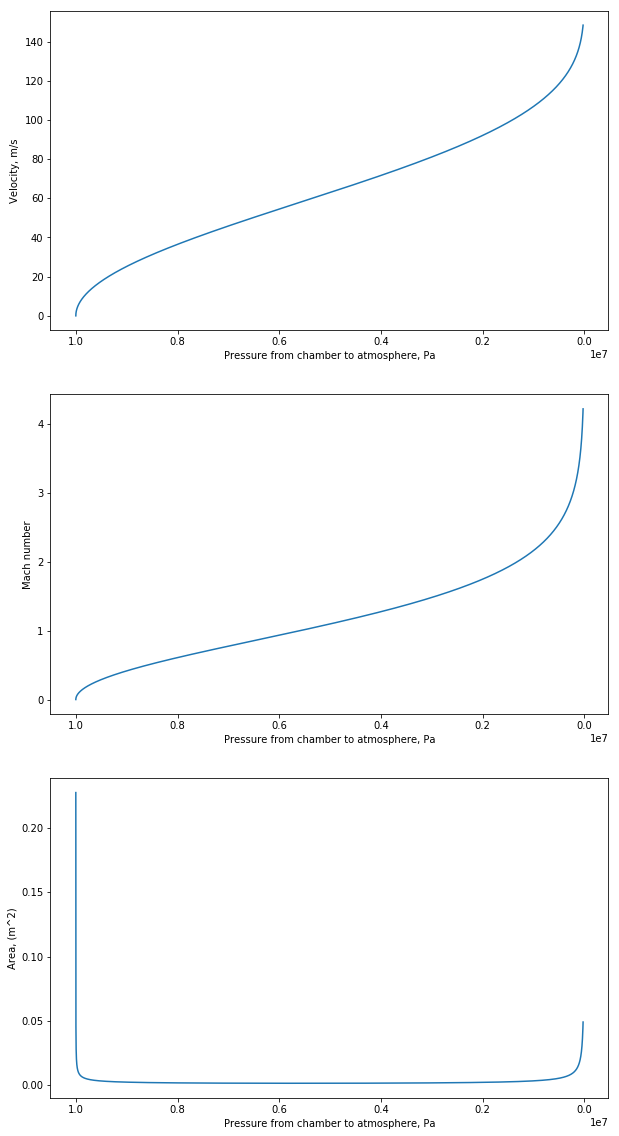

In [51]:
# plot results

fig , ax = plt.subplots(3,1)

ax[0].plot(py,v_y)
ax[0].set_xlabel('Pressure from chamber to atmosphere, Pa')
ax[0].set_ylabel('Velocity, m/s')
ax[0].invert_xaxis()

ax[1].plot(py,M_y)
ax[1].set_xlabel('Pressure from chamber to atmosphere, Pa')
ax[1].set_ylabel('Mach number')
ax[1].invert_xaxis()

ax[2].plot(py,A_y)
ax[2].set_xlabel('Pressure from chamber to atmosphere, Pa')
ax[2].set_ylabel('Area, (m^2)')
ax[2].invert_xaxis()

#fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
fig.set_figheight(20)
fig.set_figwidth(10)